## Simple example of TuRBO-m

In [1]:
from turbo import TurboM
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/sam/code/pyQEDA37/pyQEDA/pyscripts")
import pyQEDA_function
import pyQEDA_potential as pqp
import time


mode = 		LARBED_SIM
cfg file = 		/Users/sam/code/pyQEDA37/pyQEDA/crystal_files/SrTiO3.cfg
created output folder = 		/pyQEDA_simulations/
file exists
output file = 		/Users/sam/code/pyQEDA37/pyQEDA/pyQEDA_simulations//SrTiO3_001_Th200A_T100mrad_r18_maxg_1_100kV/SrTiO3_001_Th200A_T100mrad_r18_maxg_1_100kV/SrTiO3_001_Th200A_T100mrad_r18_maxg_1_100kV.img
zone axis= 		[0.0, 0.0, 1.0]
gx vector= 		[1.0, 0.0, 0.0]
surface normal = 		[0.0, 0.0, 1.0]
tilt offset (mrad) = 		[0.0, 0.0]
approximation = 		0
term threshold = 		0.0001
target Ug = 		0.07
high tension = 		100.0
max g vector = 		1.0
max sg = 		0.02
thickness = 		100.0
scan compensation = 		0.976
tilt range (mrads) = 		200.0
disc radius (pixels) = 		18
detector size x = 		316

* QEDA: Simulation of /Users/sam/code/pyQEDA37/pyQEDA/crystal_files/SrTiO3.cfg, zone = [0.0, 0.0, 1.0]



All patterns together contain 157 different beams

Residual error after kinematic rocking curve fit: 0.0026653416568586234



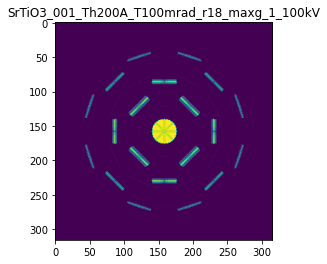

outputUg of length: 314=
[ 1.77721e-01  0.00000e+00  4.46824e-04 -4.80589e-09  4.46824e-04
  4.80589e-09  6.24332e-02  5.57210e-09  6.24332e-02 -5.57210e-09
 -8.15778e-04 -4.65311e-10 -8.15778e-04  4.65311e-10  2.42883e-02
 -4.31399e-09  2.42883e-02  4.31399e-09 -1.33479e-04 -2.18693e-09
 -1.33479e-04  2.18693e-09  1.02747e-02 -2.43742e-10  1.02747e-02
  2.43742e-10 -1.24203e-03  1.82209e-10  1.87728e-02 -2.69894e-09
  1.87728e-02  2.69894e-09 -3.48545e-04 -9.15193e-10 -1.24203e-03
 -1.82209e-10  4.83244e-02  0.00000e+00 -3.48545e-04  9.15193e-10
  4.83244e-02  0.00000e+00 -5.33758e-05  2.29455e-11  9.04688e-03
  1.11812e-09 -5.33758e-05 -2.29455e-11  9.04688e-03 -1.11812e-09
  8.43544e-03 -2.65732e-09  8.43544e-03  2.65732e-09  6.70300e-05
 -1.22440e-09  6.70300e-05  1.22440e-09  1.87728e-02  4.40353e-09
 -1.24203e-03  5.41796e-11 -3.48545e-04  3.20378e-09  4.83244e-02
  4.32121e-09  8.43544e-03  5.91464e-10  6.70300e-05  2.21872e-09
  1.87728e-02 -4.40353e-09 -1.24203e-03 -5.41796e-1

In [2]:
filename = "SrTiO3_001_Th200A_T100mrad_r18_maxg_1_100kV.qed"
#First simulate a LARBED pattern that will be our 'experimental image' - no filename runs default parameters
# The GP optimizer does not have access to the structure Factors, only the Intensities from the LARBED pattern
outputUg,diffExp = pyQEDA_function.pyQEDA(filename,\
                                                Generate_random_diffs = False, \
                                                N_training_data = 1, \
                                                UseInputUgMasterList = False, \
                                                InputUg=None,\
                                                scaling = 1,\
                                                ReturnOutputUg = True,\
                                                mode='LARBED_SIM')

UgDim = len(outputUg) #thickness will also be guessed by this this as the last element and every odd element is imaginary
print(f'outputUg of length: {len(outputUg)}=\n{outputUg}')

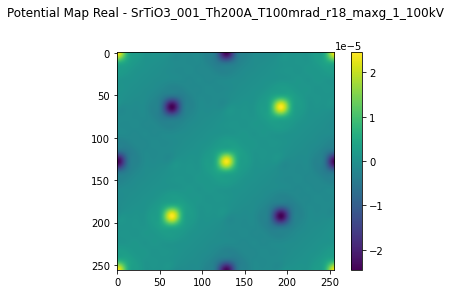

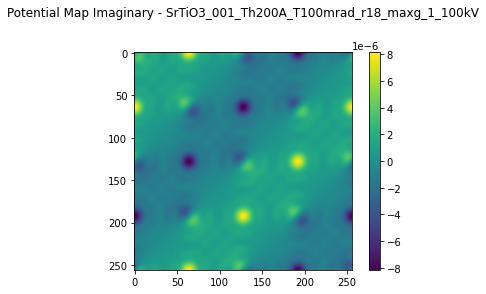

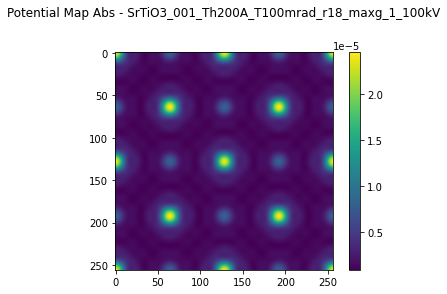

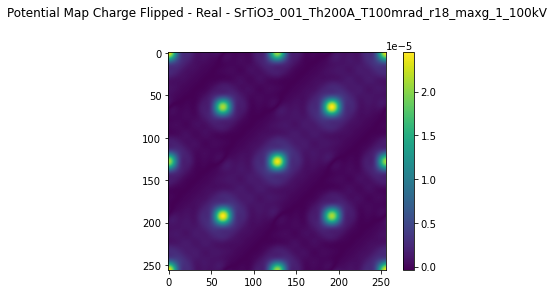

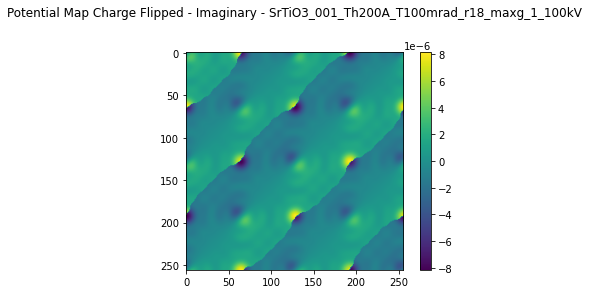

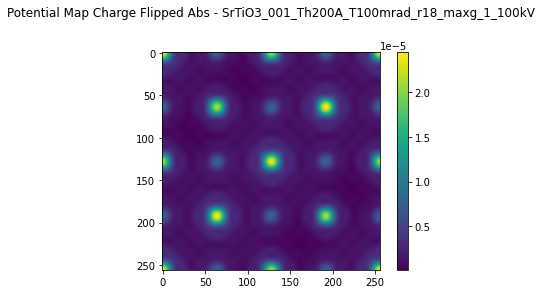


Difference pre and post Ug charge flipping
(0.177721+0j) -> (0.036656429463821416+9.079134403382032e-19j) 


In [3]:
#display potential from the simulation (already performed and saved in folder below) this also tells us which beams we need
[UgList, potMapExp, beams] = pqp.displayPotentialFromUg('SrTiO3_001_Th200A_T100mrad_r18_maxg_1_100kV',\
                                                                      potSize=([256,256]), \
                                                                      Ncells=([2,2]),     \
                                                                      showImag=True,      \
                                                                      doFlip=True,       \
                                                                      thresh = 0.015,     \
                                                                      beta = 0.9,\
                                                                     InputUg=None,\
                                                                     InputBeams=None,\
                                                                     returnComplexUg=False,\
                                                                    scaling=1)


In [ ]:
# #this tests the display potential from local variables and charge flipping
# [UgList, potMapSim] = pqp.displayPotentialFromUg(folder=None,\
#                                               potSize=([256,256]), \
#                                               Ncells=([2,2]),     \
#                                               showImag=True,      \
#                                               doFlip=True,       \
#                                               thresh = 0.015,     \
#                                               beta = 0.9,\
#                                              InputUg=UgList,\
#                                              InputBeams=beams,\
#                                              returnComplexUg=False,\
#                                              scaling=1)

In [ ]:
plt.imshow(np.abs(potMapExp))
plt.title(f"Potential Map Charge Flipped - Real - {filename}\n\n")
plt.colorbar()
plt.show()

In [ ]:
# [UgList, potMap, beams] = pqp.displayPotentialFromUg('SrTiO3_001_Th300A_T100mrad_r18_maxg_0_5_100kV',\
#                                                                       potSize=([256,256]), \
#                                                                       Ncells=([2,2]),     \
#                                                                       showImag=True,      \
#                                                                       doFlip=True,       \
#                                                                       thresh = 0.015,     \
#                                                                       beta = 0.9,\
#                                                                      InputUg=None,\
#                                                                      InputBeams=None,\
#                                                                      returnComplexUg=False,\
#                                                                     scaling=1)

In [ ]:
# #Second simulate a 100 LARBED patterns from random Ug -  this will be our initial training set
# # The GP optimizer does not have access to the structure Factors, only the Intensities from the LARBED pattern
# outputUg,diffSim = pyQEDA_function.pyQEDA(filename,\
#                                                 Generate_random_diffs = True, \
#                                                 N_training_data = 2, \
#                                                 UseInputUgMasterList = False, \
#                                                 InputUg=None,\
#                                                 ReturnOutputUg = False,\
#                                                 mode='LARBED_SIM')
# UgDim = len(outputUg) #thickness will also be guessed by this this as the last element and every odd element is imaginary
# print(f'outputUg of length: {len(outputUg[0])}=\n{outputUg[0]}')


In [ ]:
scaling = 1
global Inputbeams
InputBeams = beams
InputBeams
global iteration
iteration = 0

In [ ]:
#initialize beginning to some values
outputUg[0] = 0.1
outputUg[1::]=0.1
outputUg = outputUg*scaling
print(outputUg)

In [ ]:
# #initial starting point for diffSim
# outputUg, diffSim = pyQEDA_function.pyQEDA(filename,\
#                                                 Generate_random_diffs = False, \
#                                                 N_training_data = 1, \
#                                                 UseInputUgMasterList = True, \
#                                                 InputUg=outputUg,\
#                                                 scaling = scaling, \
#                                                 ReturnOutputUg = True,\
#                                                 mode='LARBED_SIM')

In [ ]:
#         [UgList, potMap] = pqp.displayPotentialFromUg(folder=None,\
#                                                               potSize=([256,256]), \
#                                                               Ncells=([2,2]),     \
#                                                               showImag=True,      \
#                                                               doFlip=True,       \
#                                                               thresh = 0.015,     \
#                                                               beta = 0.9,\
#                                                               InputUg=outputUg,\
#                                                               InputBeams = InputBeams, \
#                                                               returnComplexUg=False,\
#                                                               scaling=scaling)

In [ ]:
print(np.sum( diffExp ) )
print(np.sum( diffSim )) 
print(np.min( diffExp ) )
print(np.min( diffSim )) 
print(np.max( diffExp ) )
print(np.max( diffSim )) 

print(np.sum( potMapExp ) )
print(np.sum( potMapSim )) 
print(np.min( np.abs(potMapExp ) ))
print(np.min( np.abs(potMapSim )) )
print(np.max( np.abs(potMapExp ) ))
print(np.max( np.abs(potMapSim )) )

## Set up an optimization problem class

In [ ]:
class UgGP:
    def __init__(self, outputUg=outputUg):   
        self.dim = len(outputUg)
        self.outputUg = outputUg
        self.lb = -0.2 * np.ones(len(outputUg))
        self.ub = 0.2 * np.ones(len(outputUg))
        
    def __call__(self, outputUg):
        assert len(outputUg) == self.dim
        assert outputUg.ndim == 1
        assert np.all(outputUg <= self.ub) and np.all(outputUg >= self.lb)
        
        [UgList, potMapSim] = pqp.displayPotentialFromUg(folder=None,\
                                                              potSize=([256,256]), \
                                                              Ncells=([2,2]),     \
                                                              showImag=True,      \
                                                              doFlip=True,       \
                                                              thresh = 0.015,     \
                                                              beta = 0.9,\
                                                              InputUg=outputUg,\
                                                              InputBeams = beams, \
                                                              returnComplexUg=False,\
                                                              scaling=scaling)
        
        outputUg, diffSim = pyQEDA_function.pyQEDA(filename,\
                                                        Generate_random_diffs = False, \
                                                        N_training_data = 1, \
                                                        UseInputUgMasterList = True, \
                                                        InputUg=UgList,\
                                                        scaling = scaling, \
                                                        ReturnOutputUg = True,\
                                                        mode='LARBED_SIM')
        

        val = np.sum( (diffExp - diffSim )**2 )
        #val = np.sum(diffExp - diffSim*alpha - beta)**2 #where alpha is output[-3] and beta is output[-2] and thickness output[-1]
        #val = np.sum(np.abs(potMapExp) - np.abs(potMapSim))
        
        #val = np.sum((np.abs(potMapExp) - np.abs(potMapSim))**2) + np.sum( (diffExp - diffSim )**2 )
        print(f'\n\n val = {val}')
        return val

f = UgGP(outputUg)

## Create a Turbo optimizer instance

In [ ]:
turbo_m = TurboM(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=10,  # Number of initial bounds from an Symmetric Latin hypercube design
    max_evals=100,  # Maximum number of evaluations
    n_trust_regions=5,  # Number of trust regions
    batch_size=10,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=True,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=50,  # Number of steps of ADAM to learn the hypers
    min_cuda=1024,  # Run on the CPU for small datasets
    device="cpu",  # "cpu" or "cuda"
    dtype="float64",  # float64 or float32
)

# Run the optimization process

In [ ]:
before = time.time()
turbo_m.optimize()
after =time.time()
print((after-before)/60)

## Extract all evaluations from Turbo and print the best

In [ ]:
X = turbo_m.X  # Evaluated points
fX = turbo_m.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))

## Plot the progress

TuRBO-5 converges to a solution close to the global optimum

In [ ]:
fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
# plt.xlim([0, len(fX)])
# plt.ylim([0, 30])
plt.title(f"TuRBO - LARBED - {filename}")

plt.tight_layout()
plt.show()

In [ ]:
x_best

In [ ]:
x_best.size

In [ ]:
[UgList, potMapSim] = pqp.displayPotentialFromUg(folder=None,\
                                                      potSize=([256,256]), \
                                                      Ncells=([2,2]),     \
                                                      showImag=True,      \
                                                      doFlip=True,       \
                                                      thresh = 0.015,     \
                                                      beta = 0.9,\
                                                      InputUg=x_best,\
                                                      InputBeams = beams, \
                                                      returnComplexUg=False,\
                                                      scaling=scaling)

In [ ]:
plt.imshow(np.abs(potMapSim))
plt.title(f"TuRBO - Potential Map (Abs) - {filename}\n\n")
plt.colorbar()
plt.show()